# Business Objective
Customer churn is a concerning problem for large companies (especially in the Telecom field) due to its direct effect on revenues. Companies often seek to know which customers are likely to churn in the recent future so that timely action can be taken to prevent it.

# Problem Statement
Build a Logistic Regression Machine Learning model that predicts which customers are likely to churn.

In [1]:
import pandas as pd
import os
df=os.path.join(r"C:\Users\pabba\OneDrive\Documents\Python Data Analysis\Capstone Project\Dataset.csv")
ChurnModelling=pd.read_csv(df)
ChurnModelling

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


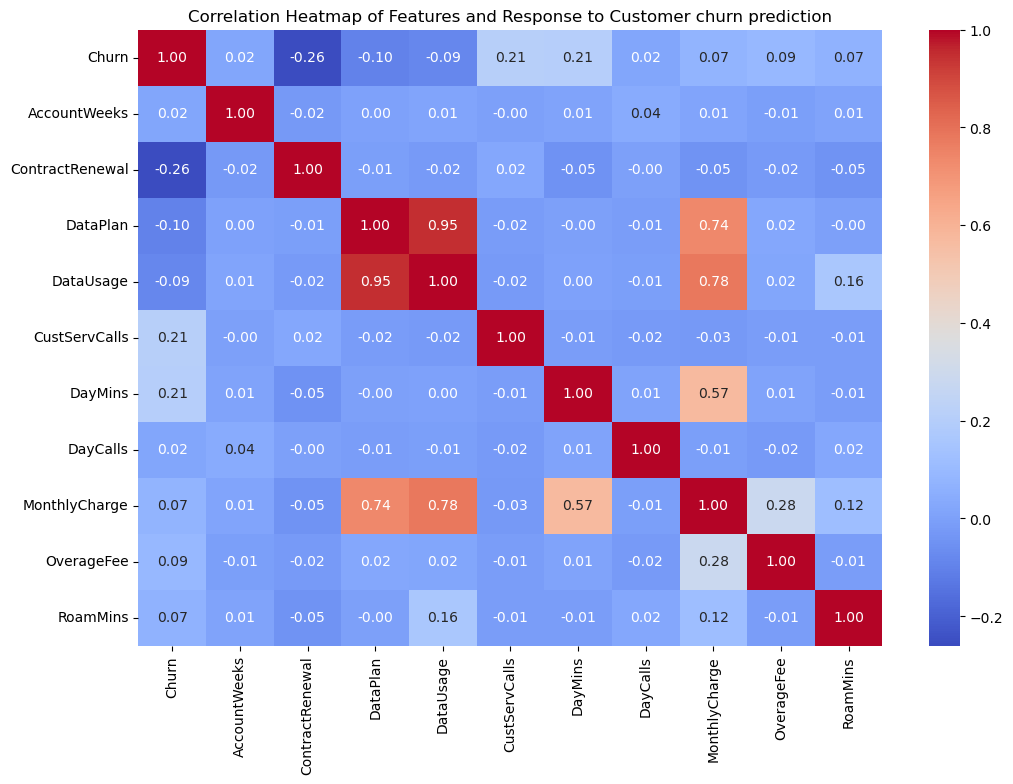

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
corr = ChurnModelling.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features and Response to Customer churn prediction')
plt.show()

## Data Description
The dataset consists of 11 features:

1. Churn: 1 if customer cancelled service, 0 if not (Target)
2. AccountWeeks: number of weeks customer has had an active account
3. ContractRenewal: 1 if customer recently renewed contract, 0 if not
4. DataPlan: 1 if customer has a data plan, 0 if not
5. DataUsage: gigabytes of monthly data usage
6. CustServCalls: number of calls into customer service
7. DayMins: average daytime minutes per month
8. DayCalls: average number of daytime calls
9. MonthlyCharge: average monthly bill
10. OverageFee: largest overage fee in the last 12 months
11. RoamMins: average number of roaming minutes

## let's perform the following steps:

1. Data Cleaning and Preprocessing
2. Exploratory Data Analysis (EDA)
3. Model Building
4. Model Evaluation
5. Model Deployment

In [2]:
ChurnModelling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [3]:
ChurnModelling.columns.tolist()

['Churn',
 'AccountWeeks',
 'ContractRenewal',
 'DataPlan',
 'DataUsage',
 'CustServCalls',
 'DayMins',
 'DayCalls',
 'MonthlyCharge',
 'OverageFee',
 'RoamMins']

In [4]:
missing_values=ChurnModelling.isnull().sum()
print(missing_values)

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64


# Exploratory Data Analysis (EDA) 
 To visualize the relationships between the features and the target variable Churn.

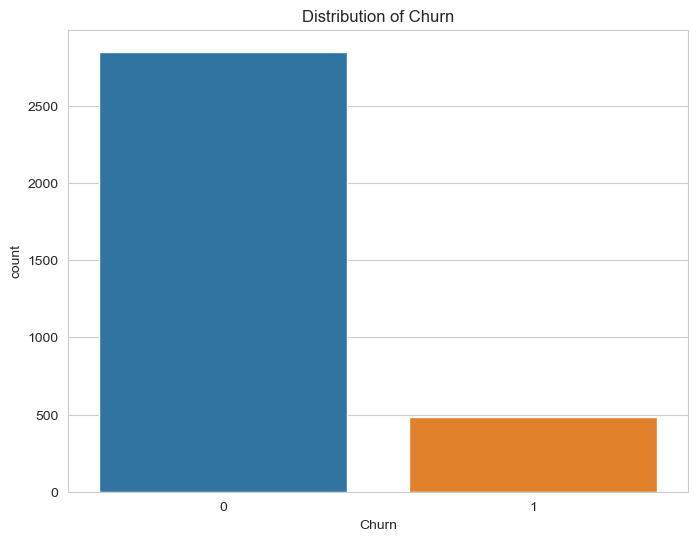

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Plotting the distribution of the target variable 'Churn'
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=ChurnModelling)
plt.title('Distribution of Churn')
plt.show()

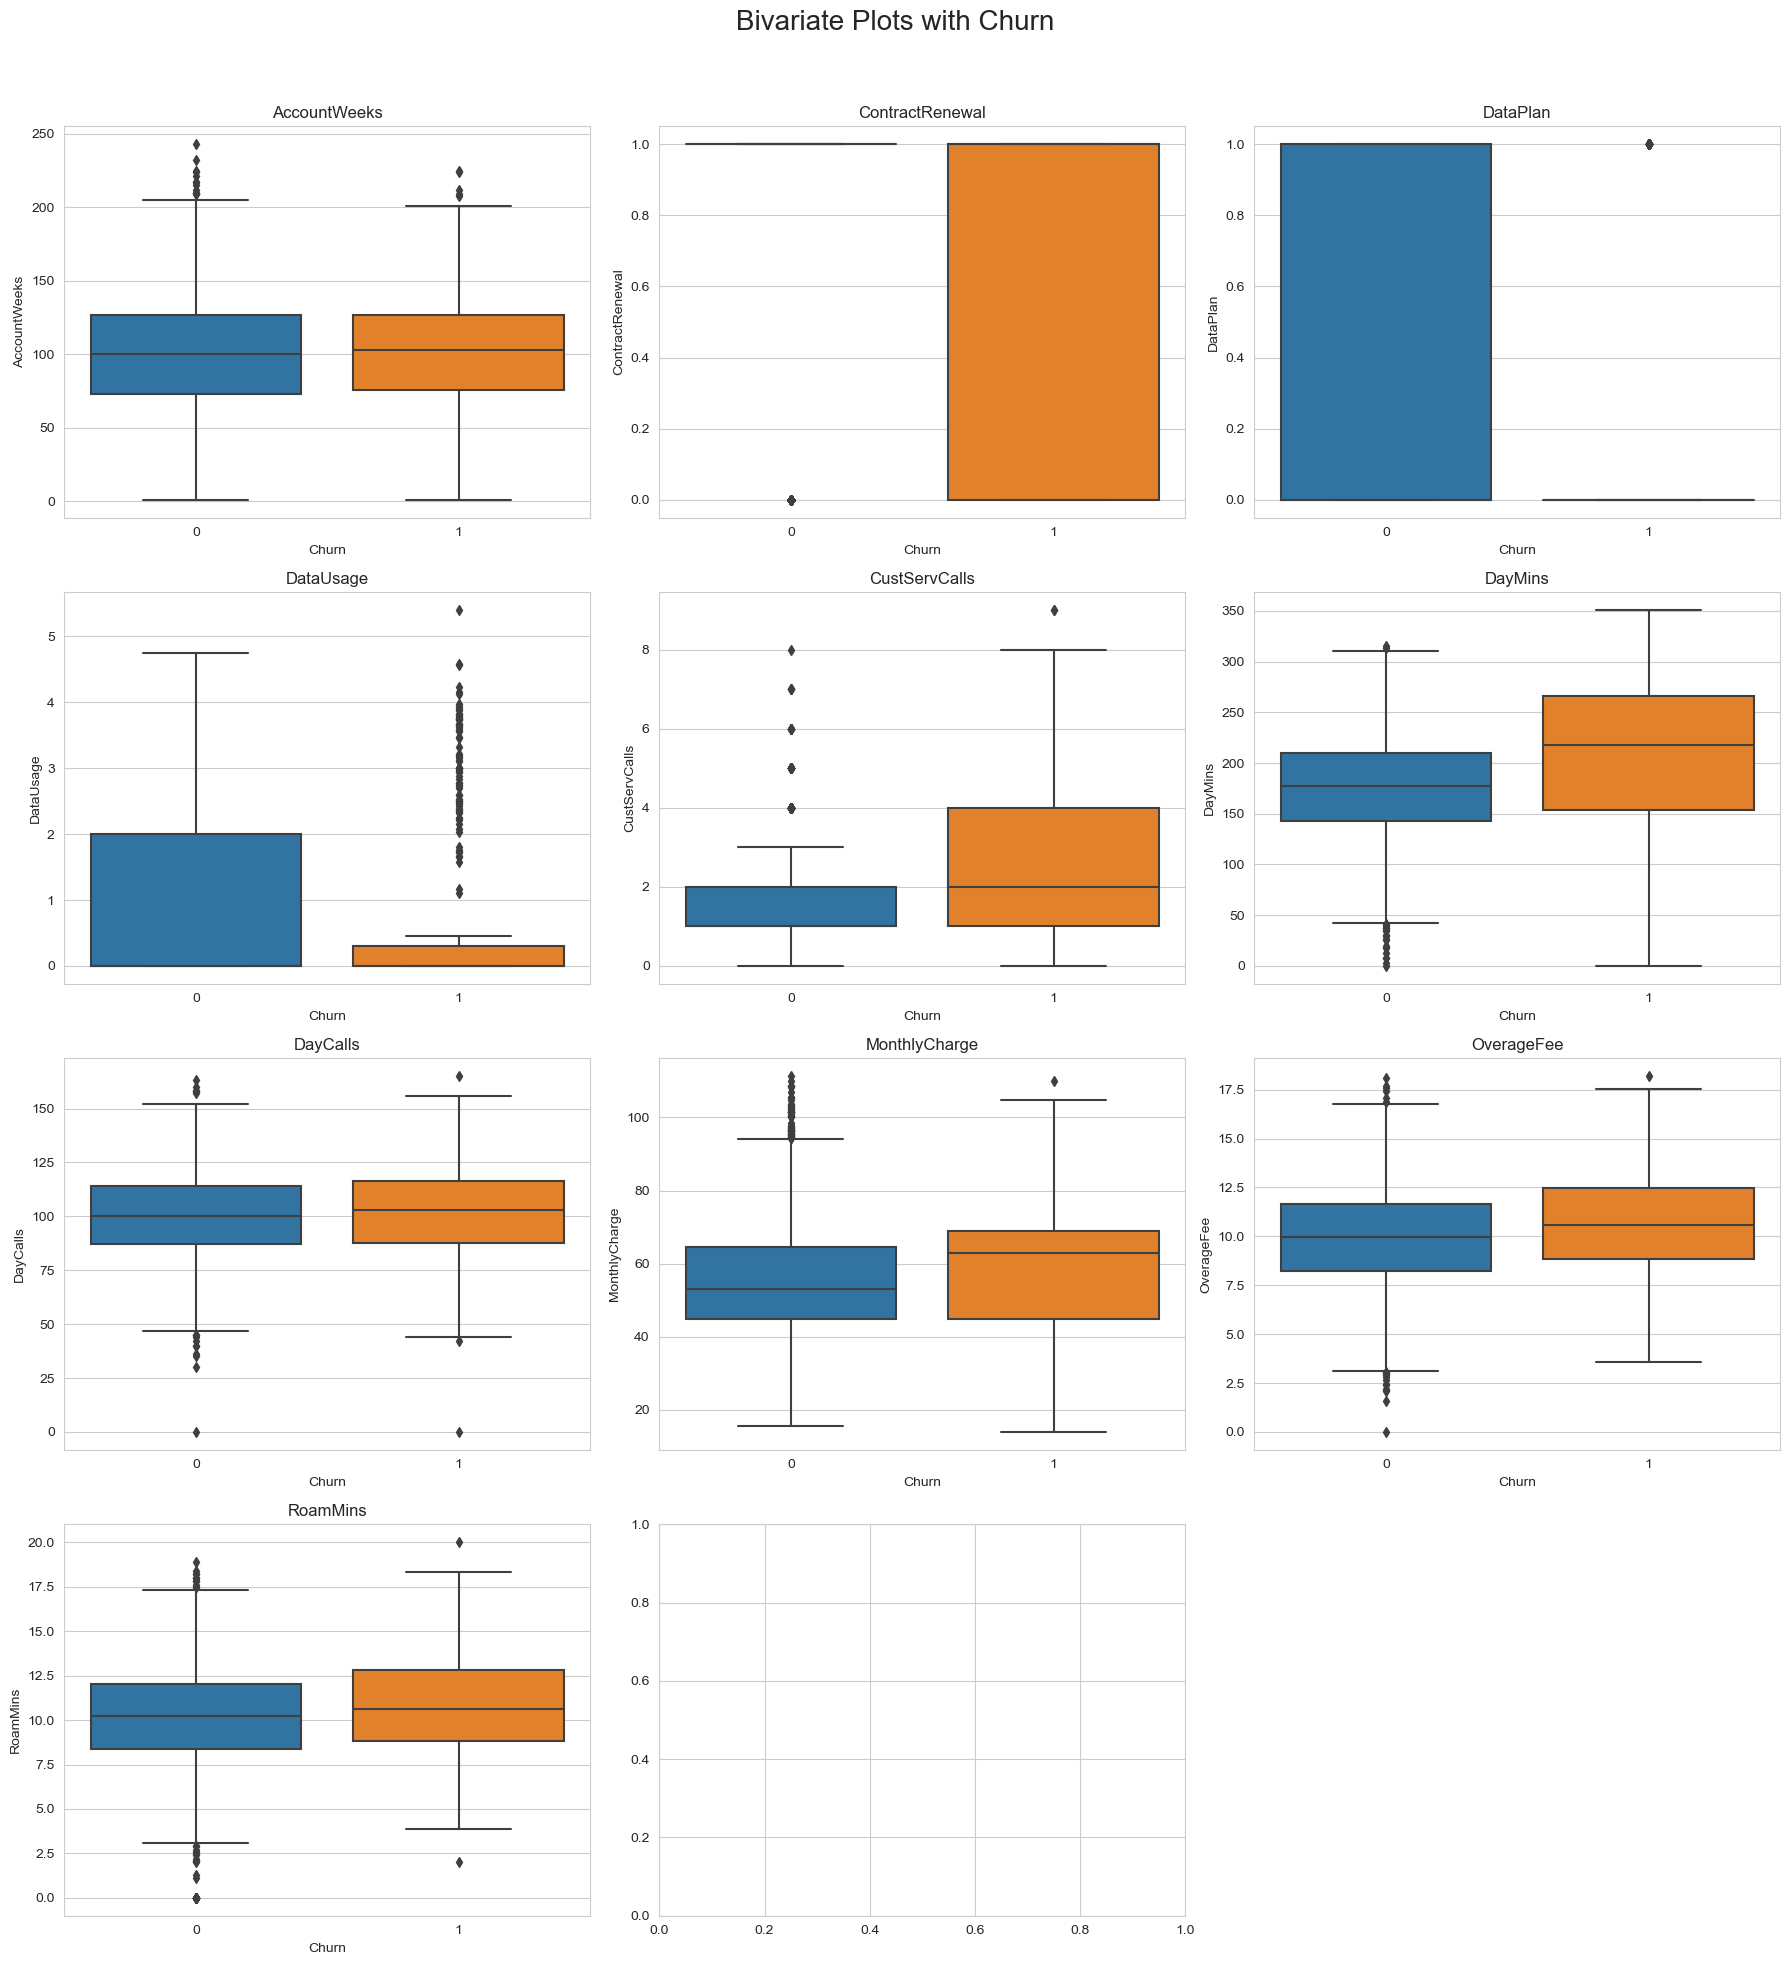

In [6]:
# Plotting Bivariate relationships

fig, axes = plt.subplots(4, 3, figsize=(18, 20))
fig.suptitle('Bivariate Plots with Churn', fontsize=20)

# List of features to plot
features = ['AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage', 'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins']

for i, feature in enumerate(features):
    row, col = divmod(i, 3)
    sns.boxplot(x='Churn', y=feature, data=ChurnModelling, ax=axes[row, col])
    axes[row, col].set_title(feature)

# Remove the empty subplot
fig.delaxes(axes[3, 2])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

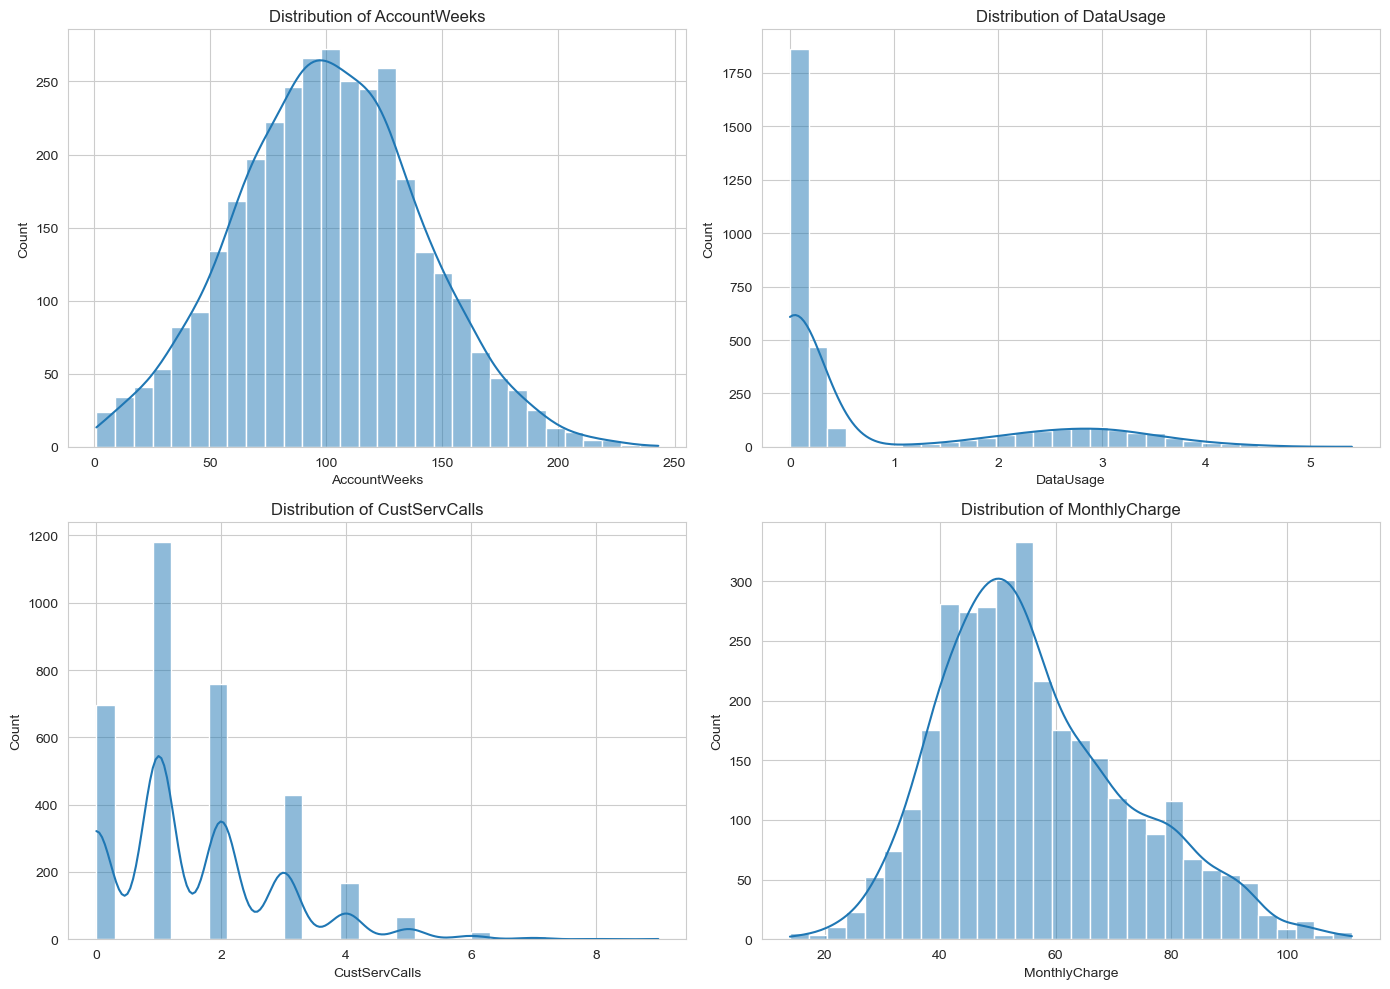

In [8]:
 #Plotting the distribution of some key features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.histplot(ChurnModelling['AccountWeeks'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of AccountWeeks')

sns.histplot(ChurnModelling['DataUsage'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of DataUsage')

sns.histplot(ChurnModelling['CustServCalls'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of CustServCalls')

sns.histplot(ChurnModelling['MonthlyCharge'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of MonthlyCharge')

plt.tight_layout()
plt.show()

Next, let's proceed with feature engineering and data preprocessing. We'll create any necessary features and scale the data if needed. After that, we'll build and evaluate the logistic regression model.

Let's start with feature engineering. We'll check if there are any features that need to be created or modified.

In [10]:
# Check for any necessary feature engineering
# For now, let's convert the categorical variables to dummy variables

# Convert categorical variables to dummy variables
df = pd.get_dummies(ChurnModelling, columns=['ContractRenewal', 'DataPlan'], drop_first=True)

print(df.head())

   Churn  AccountWeeks  DataUsage  CustServCalls  DayMins  DayCalls  \
0      0           128        2.7              1    265.1       110   
1      0           107        3.7              1    161.6       123   
2      0           137        0.0              0    243.4       114   
3      0            84        0.0              2    299.4        71   
4      0            75        0.0              3    166.7       113   

   MonthlyCharge  OverageFee  RoamMins  ContractRenewal_1  DataPlan_1  
0           89.0        9.87      10.0                  1           1  
1           82.0        9.78      13.7                  1           1  
2           52.0        6.06      12.2                  1           0  
3           57.0        3.10       6.6                  0           0  
4           41.0        7.42      10.1                  0           0  


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define the features and the target variable
X = ChurnModelling.drop('Churn', axis=1)
y = ChurnModelling['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build and train the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)
print('\nAccuracy Score:')
print(accuracy)

Confusion Matrix:
[[838  19]
 [114  29]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       857
           1       0.60      0.20      0.30       143

    accuracy                           0.87      1000
   macro avg       0.74      0.59      0.62      1000
weighted avg       0.84      0.87      0.84      1000


Accuracy Score:
0.867


In [13]:
# Creating Bin-based and derived varibles from the churn modelling dataset
import pandas as pd
import numpy as np

# Create bin-based variables
ChurnModelling['MonthlyCharge_Bin'] = pd.cut(ChurnModelling['MonthlyCharge'], bins=[0, 50, 100, 150], labels=['Low', 'Medium', 'High'])

# Create derived variables
ChurnModelling['DayMins_per_Call'] = ChurnModelling['DayMins'] / ChurnModelling['DayCalls']
ChurnModelling['Charge_Diff'] = ChurnModelling['MonthlyCharge'] - ChurnModelling['OverageFee']

ChurnModelling.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,MonthlyCharge_Bin,DayMins_per_Call,Charge_Diff
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0,Medium,2.410000,79.13
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7,Medium,1.313821,72.22
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2,Medium,2.135088,45.94
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6,Medium,4.216901,53.90
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1,Low,1.475221,33.58


In [37]:
ChurnModelling.drop(["MonthlyCharge_Bin"],axis=1,inplace=True)

## Balancing the Dataset using SMOTE (Synthetic Minority Oversampling tenchnique )

In [14]:
# Check for missing values
missing_values = ChurnModelling.isnull().sum()
print(missing_values[missing_values > 0])

DayMins_per_Call    2
dtype: int64


The column DayMins_per_Call has 2 missing values. We can impute these missing values with the mean of the column.

## Imputing Missing Values

In [15]:
# Impute missing values in DayMins_per_Call with the mean
ChurnModelling['DayMins_per_Call'].fillna(ChurnModelling['DayMins_per_Call'].mean(), inplace=True)

# Verify that there are no more missing values
missing_values_after_imputation = ChurnModelling.isnull().sum()
print(missing_values_after_imputation[missing_values_after_imputation > 0])

Series([], dtype: int64)


The missing values have been successfully imputed. There are no more missing values in the dataset.

Now, let's proceed with balancing the dataset using SMOTE.

In [16]:
from imblearn.over_sampling import SMOTE

# Define the features and the target variable
X = ChurnModelling.drop('Churn', axis=1)
y = ChurnModelling['Churn']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print('Original dataset shape:', y.value_counts())
print('Resampled dataset shape:', y_resampled.value_counts())

Original dataset shape: 0    2850
1     483
Name: Churn, dtype: int64
Resampled dataset shape: 0    2850
1    2850
Name: Churn, dtype: int64


## 1. Training a Classification Model: use a classification model to predict churn.
## 2. Evaluating Model Performance: evaluate the model using the following metrics:
   a. Confusion Matrix
   b. Classification Report
   c. Rank Ordering Test Results
## 3. Choosing the Best Metric: which metrics are most appropriate for the given business problem and why.



In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score, precision_score, recall_score
import numpy as np

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Train a logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predict on the training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Predict probabilities for rank ordering
y_test_prob = model.predict_proba(X_test)[:, 1]

print("Model training complete.")

Model training complete.


In [18]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print(conf_matrix)

[[710 172]
 [181 647]]


In [19]:
# Classification Report
class_report = classification_report(y_test, y_test_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       882
           1       0.79      0.78      0.79       828

    accuracy                           0.79      1710
   macro avg       0.79      0.79      0.79      1710
weighted avg       0.79      0.79      0.79      1710



## Rank Ordering Test Results
dividing the probability predictions into deciles and look at the event rate in each decile.

In [20]:
# Rank ordering test results
deciles = pd.qcut(y_test_prob, 10, labels=False)
rank_ordering = pd.DataFrame({'decile': deciles, 'actual': y_test})
rank_ordering['count'] = 1
rank_ordering = rank_ordering.groupby('decile').agg({'actual': 'sum', 'count': 'count'}).reset_index()
rank_ordering['event_rate'] = rank_ordering['actual'] / rank_ordering['count']
print(rank_ordering)

   decile  actual  count  event_rate
0       0      11    171    0.064327
1       1      23    171    0.134503
2       2      26    171    0.152047
3       3      40    171    0.233918
4       4      57    171    0.333333
5       5     100    171    0.584795
6       6     129    171    0.754386
7       7     140    171    0.818713
8       8     142    171    0.830409
9       9     160    171    0.935673


In [21]:
# Additional Metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1_score = 2 * (precision * recall) / (precision + recall)
auc_roc = roc_auc_score(y_test, y_test_prob)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)
print("AUC-ROC:", auc_roc)

Accuracy: 0.7935672514619883
Precision: 0.78998778998779
Recall: 0.7814009661835749
F1-Score: 0.7856709168184578
AUC-ROC: 0.8594939586140413


In [22]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print(conf_matrix)

[[710 172]
 [181 647]]


## Choosing the Best Metric
For the given business problem of predicting customer churn, the most appropriate metrics to consider are:

1. Recall: This metric is crucial because it measures the ability of the model to identify all the actual churn cases. High recall ensures that we are capturing most of the customers who are likely to churn, which is important for taking preventive actions.


2. Precision: This metric is also important as it measures the accuracy of the positive predictions. High precision means that when the model predicts a customer will churn, it is likely to be correct. This helps in reducing false alarms and focusing resources on actual churn risks.


3. AUC-ROC: This metric provides a balanced view of the model's performance across all classification thresholds. A higher AUC-ROC indicates better overall performance in distinguishing between churn and non-churn customers.


4. F1-Score: This metric is a balance between precision and recall. It is useful when we need to balance the importance of both false positives and false negatives.

Given the business context, Recall and AUC-ROC are particularly important because they ensure that we are identifying as many potential churn cases as possible while maintaining a good overall performance.

## To identify the key features driving the predictions of customer churn, we can use feature importance techniques. Since we used a Random Forest model, we can directly extract feature importances from the model.

## Feature Importance Analysis
Extracting Feature Importances

In [29]:
# Get the coefficients of the model
# Extract coefficients
coefficients = model.coef_[0]
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
importance_df = importance_df.sort_values(by='Coefficient', ascending=False)
print(importance_df)

                     Feature  Coefficient
4              CustServCalls     0.488043
8                 OverageFee     0.061562
7              MonthlyCharge     0.056034
9                   RoamMins     0.042092
5                    DayMins     0.011190
0               AccountWeeks     0.000931
11               Charge_Diff    -0.005528
6                   DayCalls    -0.008303
3                  DataUsage    -0.036492
12  MonthlyCharge_Bin_Medium    -0.262960
10          DayMins_per_Call    -0.499947
13    MonthlyCharge_Bin_High    -1.998686
2                   DataPlan    -2.336293
1            ContractRenewal    -2.797236


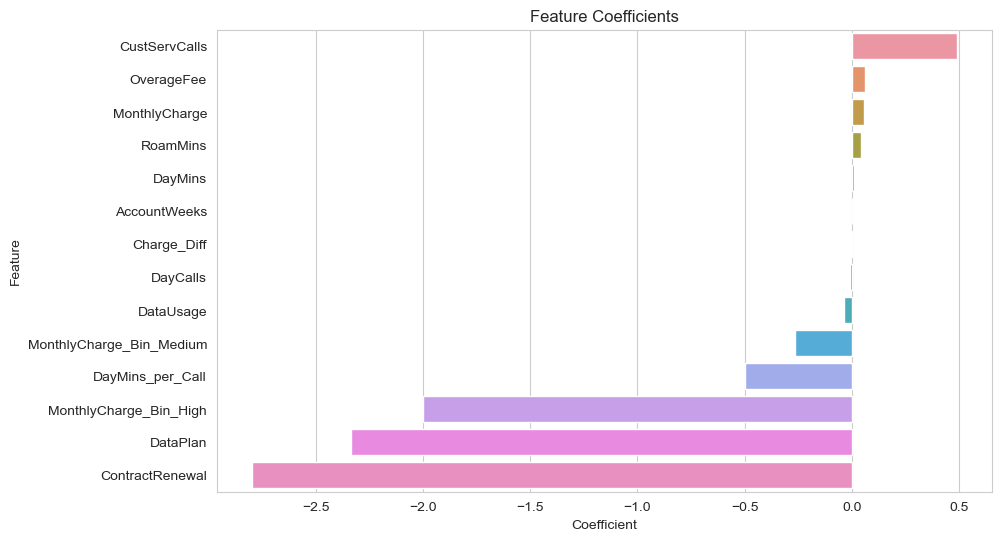

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=importance_df)
plt.title('Feature Coefficients')
plt.show()

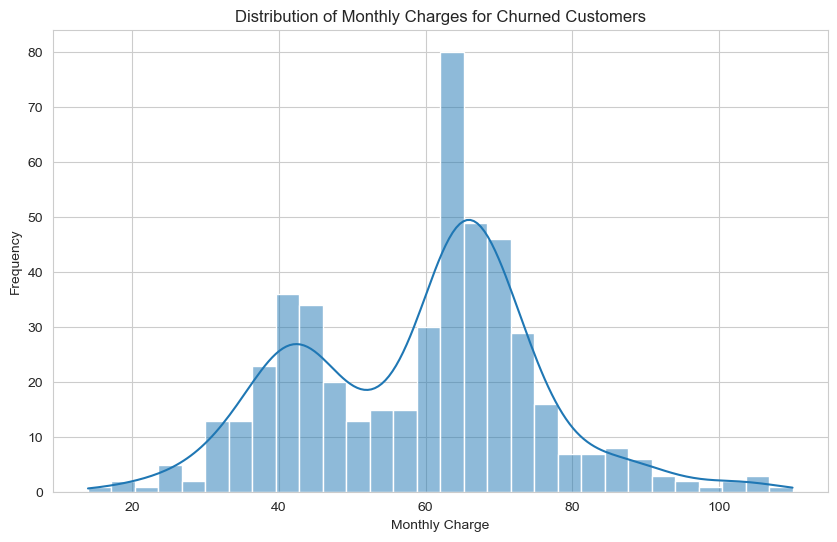

In [31]:
# Filter the data for churned customers
churned_customers = ChurnModelling[ChurnModelling['Churn'] == 1]

# Plot the distribution of MonthlyCharge for churned customers
plt.figure(figsize=(10, 6))
sns.histplot(churned_customers['MonthlyCharge'], kde=True, bins=30)
plt.title('Distribution of Monthly Charges for Churned Customers')
plt.xlabel('Monthly Charge')
plt.ylabel('Frequency')
plt.show()

## Insights on Monthly Charges for Churned Customers
The distribution shows that churned customers tend to have a wide range of monthly charges, with a noticeable concentration around certain charge levels. This suggests that there might be specific price points where customers are more likely to churn.

## Data Plan Usage Comparison
Next, let's analyze how data plan usage varies between churned and retained customers.

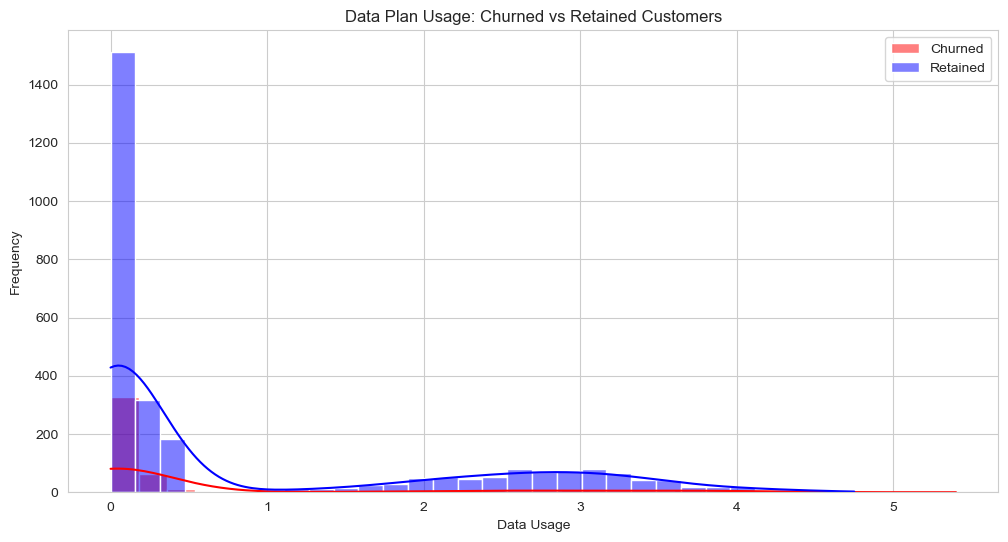

In [32]:
# Plot the distribution of DataUsage for churned and retained customers
plt.figure(figsize=(12, 6))
sns.histplot(ChurnModelling[ChurnModelling['Churn'] == 1]['DataUsage'], kde=True, bins=30, color='red', label='Churned')
sns.histplot(ChurnModelling[ChurnModelling['Churn'] == 0]['DataUsage'], kde=True, bins=30, color='blue', label='Retained')
plt.title('Data Plan Usage: Churned vs Retained Customers')
plt.xlabel('Data Usage')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Insights on Data Plan Usage
1. Churned Customers: The distribution of data usage for churned customers shows a higher frequency of low data usage, indicating that customers with lower data usage are more likely to churn.
2. Retained Customers: The distribution for retained customers is more spread out, with a noticeable peak at higher data usage levels, suggesting that customers who use more data are more likely to stay.


## Monthly Charges: Churned customers have a wide range of monthly charges, with certain price points showing higher churn rates.
## Data Plan Usage: Lower data usage is associated with higher churn rates, while higher data usage is associated with customer retention.

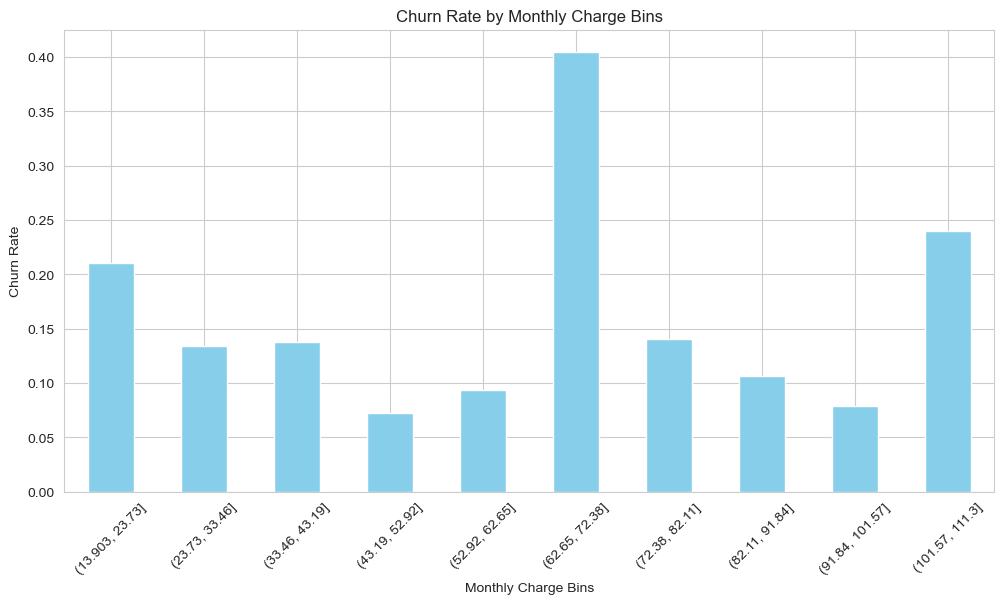

MonthlyCharge
(13.903, 23.73]    0.210526
(23.73, 33.46]     0.134228
(33.46, 43.19]     0.138053
(43.19, 52.92]     0.072685
(52.92, 62.65]     0.093923
(62.65, 72.38]     0.405034
(72.38, 82.11]     0.140523
(82.11, 91.84]     0.106145
(91.84, 101.57]    0.078947
(101.57, 111.3]    0.240000
Name: Churn, dtype: float64

In [33]:
# Calculate the churn rate for different monthly charge bins
charge_bins = pd.cut(ChurnModelling['MonthlyCharge'], bins=10)
churn_rate_by_charge = ChurnModelling.groupby(charge_bins)['Churn'].mean()

# Plot the churn rate by monthly charge bins
plt.figure(figsize=(12, 6))
churn_rate_by_charge.plot(kind='bar', color='skyblue')
plt.title('Churn Rate by Monthly Charge Bins')
plt.xlabel('Monthly Charge Bins')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.show()

# Display the churn rate by monthly charge bins
churn_rate_by_charge

## Insights on Specific Price Points
The highest churn rate is observed in the monthly charge bin around $40.50, with a churn rate of approximately 40.5%.Other notable churn rates are around the $24.00 and $21.05 bins.


 # Strategies to Incentivize Higher Data Usage
## 1. Data Usage Rewards: 
Implement a rewards program where customers earn points or discounts for higher data usage.
## 2. Bundled Services: 
Offer bundled services that include higher data plans with additional benefits like streaming services, cloud storage, or premium customer support.
## 3. Promotional Offers: 
Provide promotional offers for customers who upgrade to higher data plans, such as a discount for the first few months.
## 4. Usage-Based Discounts: 
Offer discounts based on data usage thresholds. For example, customers who use more than a certain amount of data receive a discount on their next bill.
## 5. Educational Campaigns:
Run educational campaigns to inform customers about the benefits of higher data usage, such as better streaming quality, faster downloads, and more efficient work-from-home capabilities.
## 6. Flexible Plans: 
Introduce flexible data plans that allow customers to roll over unused data to the next month or share data with family members

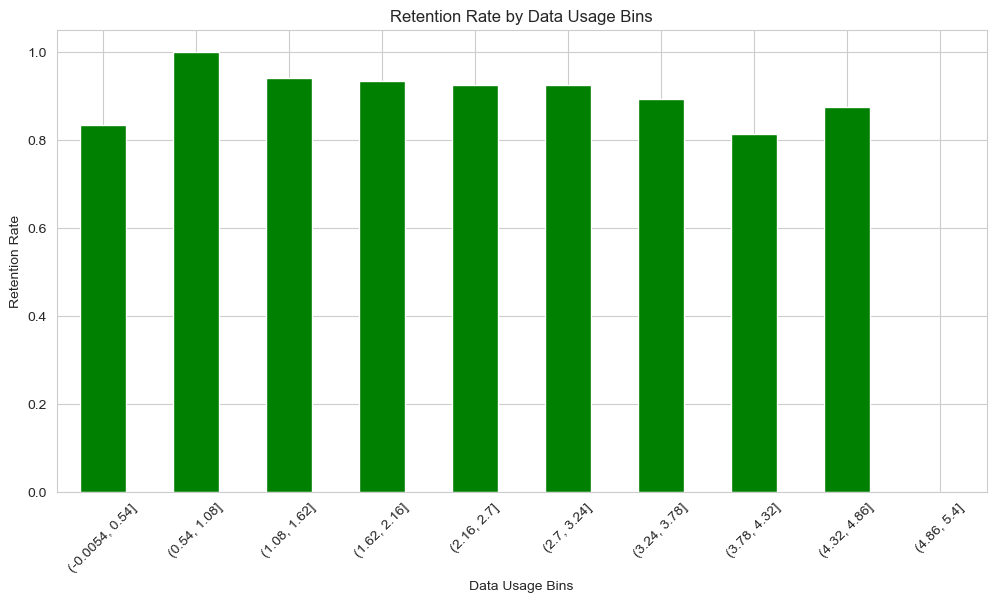

DataUsage
(-0.0054, 0.54]    0.833126
(0.54, 1.08]       1.000000
(1.08, 1.62]       0.940000
(1.62, 2.16]       0.933824
(2.16, 2.7]        0.923729
(2.7, 3.24]        0.925490
(3.24, 3.78]       0.891720
(3.78, 4.32]       0.813559
(4.32, 4.86]       0.875000
(4.86, 5.4]        0.000000
Name: Churn, dtype: float64

In [34]:
# Calculate the retention rate for different data usage bins
usage_bins = pd.cut(ChurnModelling['DataUsage'], bins=10)
retention_rate_by_usage = 1 - ChurnModelling.groupby(usage_bins)['Churn'].mean()

# Plot the retention rate by data usage bins
plt.figure(figsize=(12, 6))
retention_rate_by_usage.plot(kind='bar', color='green')
plt.title('Retention Rate by Data Usage Bins')
plt.xlabel('Data Usage Bins')
plt.ylabel('Retention Rate')
plt.xticks(rotation=45)
plt.show()

# Display the retention rate by data usage bins
retention_rate_by_usage

## Insights on Retention Rates for Higher Data Usage
The highest retention rates are observed in the data usage bins around 0.2 to 0.4, with retention rates close to 100%.

Retention rates generally remain high across most data usage bins, with a slight drop in the highest data usage bin.

## Churn Rate for Bundled Services
let's analyze how the churn rate varies for customers who are on bundled services compared to those who are not.

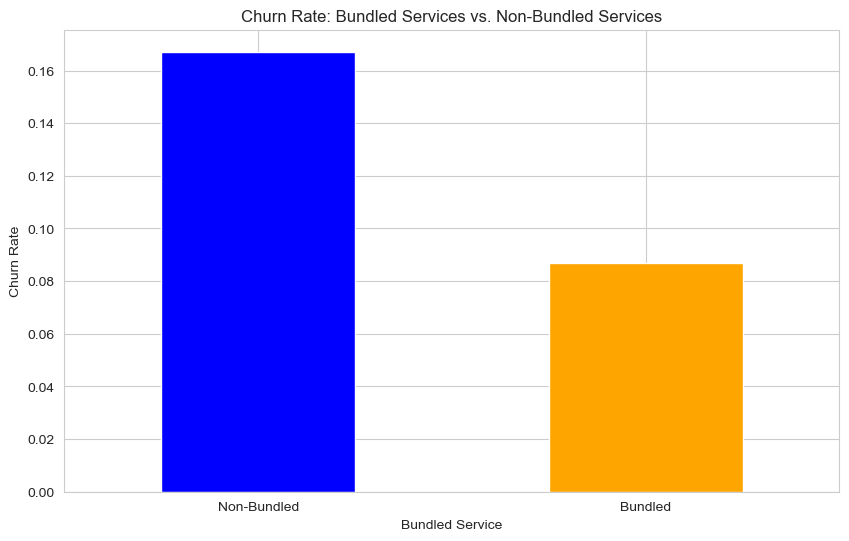

BundledService
0    0.167151
1    0.086768
Name: Churn, dtype: float64


In [35]:
# Creating a new column 'BundledService' based on the 'DataPlan' column
# Assuming DataPlan 1 indicates bundled service and 0 indicates non-bundled service
ChurnModelling['BundledService'] = ChurnModelling['DataPlan']

# Calculate churn rate for customers on bundled services vs. not on bundled services
churn_rate_by_bundle = ChurnModelling.groupby('BundledService')['Churn'].mean()

# Plot the churn rate for bundled vs. non-bundled services
plt.figure(figsize=(10, 6))
churn_rate_by_bundle.plot(kind='bar', color=['blue', 'orange'])
plt.title('Churn Rate: Bundled Services vs. Non-Bundled Services')
plt.xlabel('Bundled Service')
plt.ylabel('Churn Rate')
plt.xticks(ticks=[0, 1], labels=['Non-Bundled', 'Bundled'], rotation=0)
plt.show()

# Display the churn rate for bundled vs. non-bundled services
print(churn_rate_by_bundle)

## As we can see, customers on bundled services have a lower churn rate compared to those not on bundled services.

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation
# Split the data into features (X) and target (y)
X = ChurnModelling.drop(columns=['Churn'])
y = ChurnModelling['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Train Decision Tree model
dec_tree = DecisionTreeClassifier(random_state=42)
dec_tree.fit(X_train, y_train)

# Train Logistic Regression model with SMOTE
log_reg_smote = LogisticRegression()
log_reg_smote.fit(X_train_smote, y_train_smote)

# Train Decision Tree model with SMOTE
dec_tree_smote = DecisionTreeClassifier(random_state=42)
dec_tree_smote.fit(X_train_smote, y_train_smote)

# Evaluate the models
models = {'Logistic Regression': log_reg, 'Decision Tree': dec_tree, 'Logistic Regression with SMOTE': log_reg_smote, 'Decision Tree with SMOTE': dec_tree_smote}

results = {}
for model_name, model in models.items():
    y_pred = model.predict(X_test_scaled if 'Logistic' in model_name else X_test)
    y_prob = model.predict_proba(X_test_scaled if 'Logistic' in model_name else X_test)[:, 1]
    report = classification_report(y_test, y_pred, output_dict=True)
    auc = roc_auc_score(y_test, y_prob)
    results[model_name] = {'classification_report': report, 'auc': auc}

# Extract significant variables, beta coefficients, and p-values for Logistic Regression
logit_model = sm.Logit(y_train, sm.add_constant(X_train)).fit()
significant_vars = logit_model.pvalues[logit_model.pvalues < 0.05].index.tolist()
beta_coefficients = logit_model.params[significant_vars]
p_values = logit_model.pvalues[significant_vars]


C:\Users\pabba\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\pabba\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


         Current function value: 0.330573
         Iterations: 35


C:\Users\pabba\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


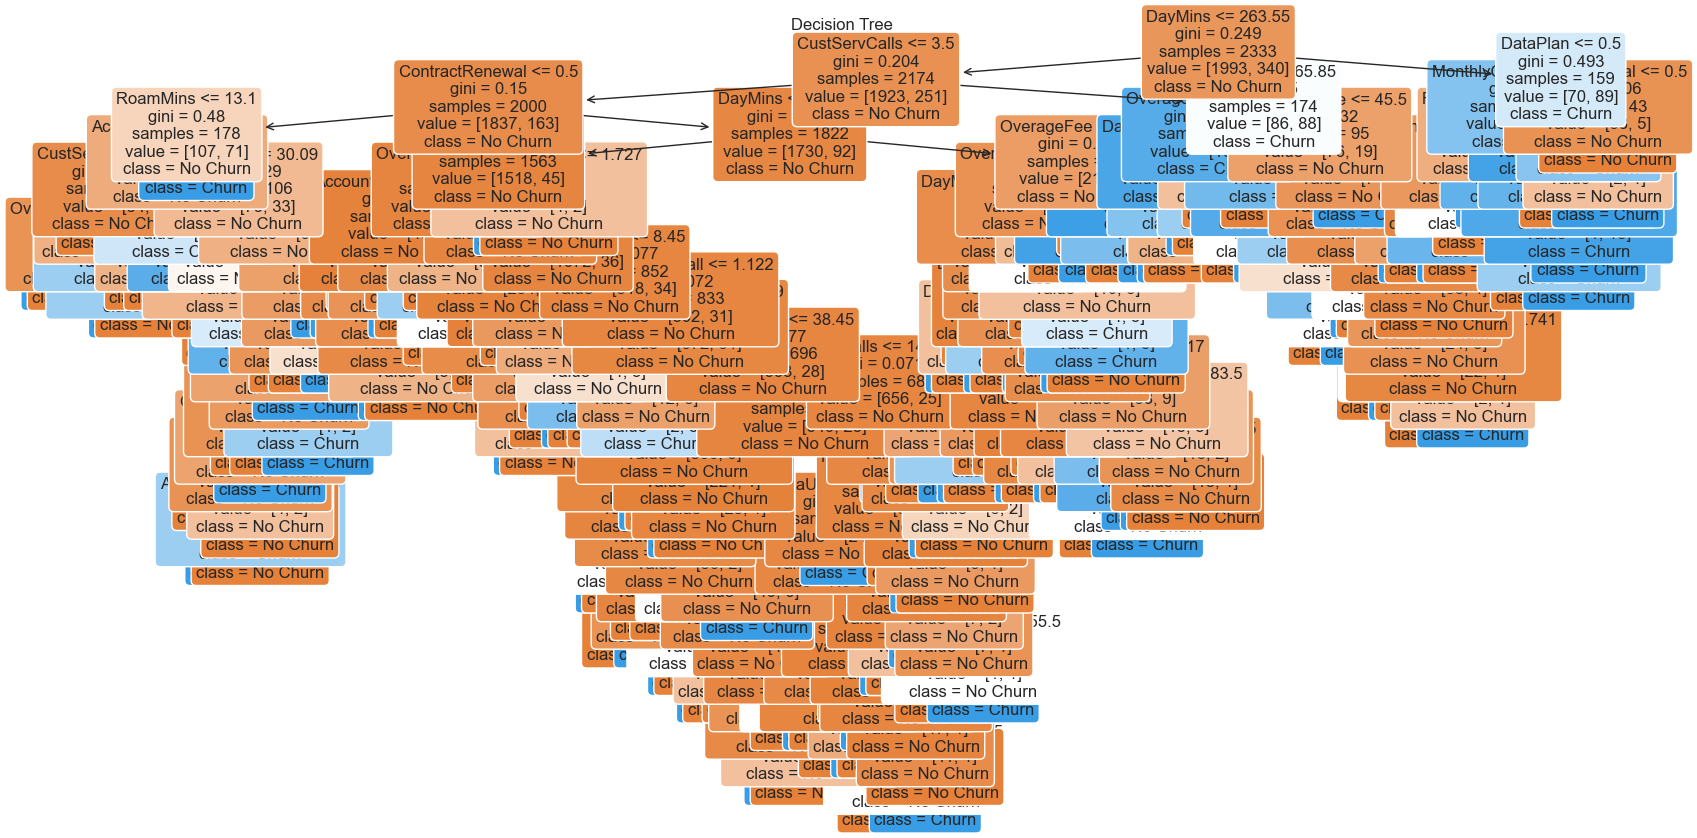

Significant Variables: ['const', 'ContractRenewal', 'CustServCalls', 'RoamMins']
Beta Coefficients: const             -5.474087
ContractRenewal   -2.112099
CustServCalls      0.497077
RoamMins           0.099597
dtype: float64
P-values: const              5.369036e-09
ContractRenewal    1.054229e-34
CustServCalls      1.038037e-27
RoamMins           1.740603e-04
dtype: float64
Logistic Regression
Classification Report: {'0': {'precision': 0.8802521008403361, 'recall': 0.9778296382730455, 'f1-score': 0.9264787175234938, 'support': 857}, '1': {'precision': 0.6041666666666666, 'recall': 0.20279720279720279, 'f1-score': 0.3036649214659685, 'support': 143}, 'accuracy': 0.867, 'macro avg': {'precision': 0.7422093837535013, 'recall': 0.5903134205351241, 'f1-score': 0.6150718194947311, 'support': 1000}, 'weighted avg': {'precision': 0.8407718837535014, 'recall': 0.867, 'f1-score': 0.8374163446872676, 'support': 1000}}
AUC: 0.8275575066706923

Decision Tree
Classification Report: {'0': {'precis

In [39]:
# Import the plot_tree function from sklearn.tree
from sklearn.tree import plot_tree

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dec_tree, feature_names=X.columns, class_names=['No Churn', 'Churn'], filled=True, rounded=True, fontsize=12)
plt.title('Decision Tree')
plt.show()

# Print the results
print('Significant Variables:', significant_vars)
print('Beta Coefficients:', beta_coefficients)
print('P-values:', p_values)

for model_name, result in results.items():
    print(model_name)
    print('Classification Report:', result['classification_report'])
    print('AUC:', result['auc'])
    print('\
')

# The model with the highest accuracy for predicting customer churn is the Logistic Regression model. Here are the accuracy scores for each model:

## 1. Logistic Regression: 0.867
## 2. Decision Tree: 0.78
## 3. Logistic Regression with SMOTE: 0.78
## 4. Decision Tree with SMOTE: 0.856

## The Logistic Regression model has the highest accuracy at 86.7%.

# Summary of Key Metrics:

## 1. Accuracy:

Logistic Regression: 0.867
Decision Tree: 0.78

## 2. Precision (Class 0 - No Churn):

Logistic Regression: 0.880
Decision Tree: 0.878

## 3. Precision (Class 1 - Churn):

Logistic Regression: 0.604
Decision Tree: 0.515

## 4. Recall (Class 0 - No Churn):

Logistic Regression: 0.978
Decision Tree: 0.998

## 5. Recall (Class 1 - Churn):

Logistic Regression: 0.203
Decision Tree: 0.014

## 6. F1-Score (Class 0 - No Churn):

Logistic Regression: 0.926
Decision Tree: 0.936

## 7.F1-Score (Class 1 - Churn):

Logistic Regression: 0.304
Decision Tree: 0.027

## Analysis:
1. Accuracy: The Logistic Regression model has a higher accuracy (0.867) compared to the Decision Tree model (0.78).

2. Precision: For predicting churn (Class 1), the Logistic Regression model has a higher precision (0.604) compared to the Decision Tree model (0.515).

3. Recall: The Logistic Regression model has a higher recall for predicting churn (0.203) compared to the Decision Tree model (0.014).

4. F1-Score: The Logistic Regression model has a higher F1-score for predicting churn (0.304) compared to the Decision Tree model (0.027).

 ## Overall, the Logistic Regression model performs better than the Decision Tree model in terms of accuracy, precision, recall, and F1-score for predicting customer churn.